In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = '/content/drive/MyDrive/Kaggle/plotly/'

In [ ]:
mcr = pd.read_csv(path+'multipleChoiceResponses.csv', encoding='ISO-8859-1')

In [ ]:
mcr

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

### 파이차트

In [ ]:
colors = ['aqua', 'lightgrey', 'lightgreen', '#D0F9B1', 'khaki', 'grey']
mcr['GenderSelect'] = np.where(mcr['GenderSelect'] == "Non-binary, genderqueer, or gender non-conforming",'Non-binary',
                             mcr['GenderSelect'])

gender = mcr['GenderSelect'].value_counts()
label = gender.index
size = gender.values

trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors))

data = [trace]
layout = go.Layout(title='Gender Distribution')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
gender

Male                    13610
Female                   2778
A different identity      159
Non-binary                 74
Name: GenderSelect, dtype: int64

## 지도 그림

In [ ]:
df = pd.DataFrame(mcr['Country'].value_counts())
df['country'] = df.index
df.columns = ['number', 'country']
df = df.reset_index().drop('index', axis=1)

In [ ]:
df

,number,country
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [ ]:
data = [dict(
        type = 'choropleth',
        locations = df['country'], # Spatial coordinates
        locationmode = 'country names', # set of locations match entries in `locations`
        z = df['number'], # Data to be color-coded
        text = df['country'], # hover text
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],
                      [0.5,"rgb(70, 100, 245)"],
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],
                      [1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) 
        ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'Survey Respondents')
)
       ]

layout = dict(
    title = 'The Nationality of Respondents',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator')
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

map projection type 부연 설명: https://en.wikipedia.org/wiki/List_of_map_projections

## Bar plot

In [ ]:
mcr = mcr[(mcr['Age'] < 75) & (mcr['Age'] > 18)]

age = round(mcr['Age'].value_counts(normalize=True), 4)
trace = go.Bar(
    x=age.index,
    y=age.values,
    marker=dict(
        color = age.values,
        colorscale='Reds',
        showscale=True)
)

data = [trace]
layout = go.Layout(title='Age distribution', 
                   yaxis = dict(title = '# of Respondents')
                  )

fig = go.Figure(data=data, layout=layout)
fig['layout'].update(template='plotly_white')
fig['layout']['xaxis'].update(dict(title = 'Age', 
                                   tickfont = dict(size = 12)))
py.iplot(fig)

In [ ]:
train = mcr['FirstTrainingSelect'].value_counts()
label = train.index
size = train.values
colors = ['aqua', 'lightgrey', 'lightgreen', '#D0F9B1', 'khaki', 'grey']

trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors)
              )

data = [trace]
layout = go.Layout(title='First Training Platform',
                   legend=dict(orientation="h")
                  )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### subplot

In [ ]:
mcr['CoursePlatformSelect'].unique()

array([nan, 'Coursera,edX', 'Coursera', 'Coursera,DataCamp,edX', 'Other',
       'Coursera,edX,Udacity', 'Coursera,Udacity', 'Coursera,DataCamp',
       'DataCamp,Udacity,Other', 'Coursera,DataCamp,edX,Udacity,Other',
       'edX', 'DataCamp', 'Udacity', 'Coursera,DataCamp,Udacity',
       'Coursera,Other', 'DataCamp,edX,Udacity',
       'Coursera,DataCamp,edX,Udacity', 'Coursera,Udacity,Other',
       'Coursera,edX,Udacity,Other', 'Coursera,DataCamp,Other',
       'DataCamp,Other', 'Coursera,edX,Other', 'DataCamp,edX,Other',
       'Coursera,DataCamp,edX,Other', 'DataCamp,edX', 'Udacity,Other',
       'DataCamp,Udacity', 'edX,Other', 'edX,Udacity',
       'Coursera,DataCamp,Udacity,Other', 'DataCamp,edX,Udacity,Other'],
      dtype=object)

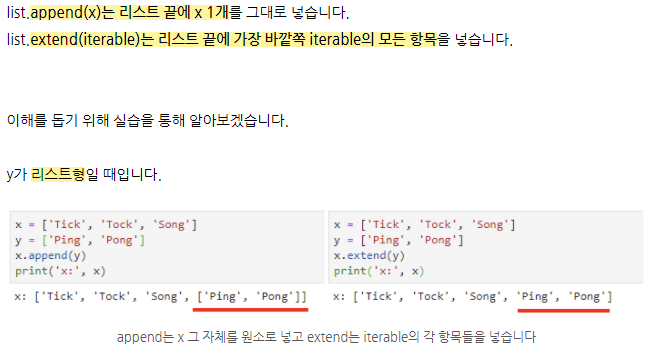

In [ ]:
course = mcr['CoursePlatformSelect'].str.split(',')
course_set = []

for i in course.dropna():
    course_set.extend(i)
courses = round(pd.Series(course_set).value_counts(normalize=True)[:5], 4).\
        sort_values(ascending = False).to_frame()  

trace1 = go.Bar(
    x=courses.index,
    y=courses[0],
    name='course',
    marker=dict(
        color=courses[0],
        colorscale = "Jet"))

learning = mcr['LearningPlatformSelect'].str.split(',')
learning_set = []
for i in learning.dropna():
    learning_set.extend(i)
learn = round(pd.Series(learning_set).value_counts(normalize=True)[:5], 4).\
        sort_values(ascending = False).to_frame()  
trace2 = go.Bar(
    x=learn.index,
    y=learn[0],
    name='platform',
    marker=dict(
        color=learn[0],
        colorscale = "Jet")
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Course Platforms', 
                                                          'Learning Platforms'))
fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)
fig['layout'].update(height=500, width=820, 
                     title='Where to start & How to continue in DS?', 
                     showlegend=False,
                     template='plotly_white')                        
py.iplot(fig)

## Scatter plot

US, non-US salary 비교

In [ ]:
mcr['CompensationAmount'].unique()

array([nan, '250,000', '80000', '1200000', '95,000', '1100000', '120,000',
       '20000', '100000', '624000', '65000', '156000000', '150000',
       '126000', '130,000', '133000', '30000', '28000', '200000', '15000',
       '72000', '120000', '100,000', '36000', '215000', '61000', '83500',
       '115000', '4000000', '135000', '75000', '190000', '1500', '25000',
       '372000', '45000', '10000', '60000', '840000', '29000', '85,000',
       '12000', '65,000', '3,000', '55000', '85000', '360000', '20,000',
       '92,000', '66390', '79000', '305000', '90000', '90,000', '40000',
       '35000', '800000', '480', '92000', '38000', '140000', '160000',
       '52000', '25,000', '96', '33000', '1400000', '80,000', '180000',
       '18000', '42500', '14000', '109500', '3600000', '39,000', '0',
       '155000', '170,075', '110000', '300000', '36,000', '40000000',
       '87000', '49000', '2000000', '40,000', '50000', '470000', '96000',
       '173000', '31000', '17200', '150,000', '130000', '1

In [ ]:
mcr['CompensationAmount']=mcr['CompensationAmount'].str.replace(',','')
mcr['CompensationAmount']=mcr['CompensationAmount'].str.replace('-','')

In [ ]:
salary=mcr[['CompensationAmount','CompensationCurrency','Country','JobSatisfaction',
            'CurrentJobTitleSelect', 'Age','GenderSelect']].dropna()

In [ ]:
salary

,CompensationAmount,CompensationCurrency,Country,JobSatisfaction,CurrentJobTitleSelect,Age,GenderSelect
3,250000,USD,United States,10 - Highly Satisfied,Operations Research Practitioner,56.0,Male
8,80000,AUD,Australia,7,Business Analyst,43.0,Female
9,1200000,RUB,Russia,7,Software Developer/Software Engineer,33.0,Male
11,95000,INR,India,7,Data Scientist,27.0,Male
14,1100000,TWD,Taiwan,5,Software Developer/Software Engineer,26.0,Male
...,...,...,...,...,...,...,...
16507,50000,USD,Other,4,DBA/Database Engineer,56.0,Male
16517,84000,EUR,Germany,6,Software Developer/Software Engineer,34.0,Male
16525,200000,USD,United States,7,Data Scientist,50.0,Male
16577,75000,EUR,Norway,8,Data Analyst,32.0,Male


In [ ]:
crates=pd.read_csv(path+'conversionRates.csv')

In [ ]:
crates

,Unnamed: 0,originCountry,exchangeRate
0,1,USD,1.000000
1,2,EUR,1.195826
2,3,INR,0.015620
3,4,GBP,1.324188
4,5,BRL,0.321350
...,...,...,...
81,82,SVC,0.114124
82,83,SZL,0.077002
83,84,UYU,0.034642
84,85,XAF,0.001823


In [ ]:
crates.drop('Unnamed: 0', axis=1,inplace=True)
salary=salary.merge(crates, left_on='CompensationCurrency', right_on='originCountry', how='left')
salary['Salary']= pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']

In [ ]:
us_salary = salary[(salary['Salary'] > 100) & (salary['Salary'] < 500000) & 
                   (salary['Country'] == 'United States')]
non_us_salary = salary[(salary['Salary'] > 100) & (salary['Salary'] < 500000) & 
                       (~(salary['Country'] == 'United States'))]

In [ ]:
us_group = us_salary.groupby('Age')['Salary'].median().to_frame()
non_us_group = non_us_salary.groupby('Age')['Salary'].median().to_frame()

trace0 = go.Scatter(
    x = us_group.index,
    y = us_group['Salary'].round(-2),
    name = 'US',
    mode='markers',
    marker=dict(
        size=9,
        color = ('aqua')))

trace1 = go.Scatter(
    x = non_us_group.index,
    y = non_us_group['Salary'].round(-2),
    name = 'non-US',
    mode='markers',
    marker=dict(
        size=9,
        color = ('navy')))

data = [trace0, trace1]
layout = dict(title = 'The Median Salary by Age in US and Non-US Countries',
              xaxis = dict(title = 'Age'),
              yaxis = dict(title = 'Salary ($)')
             )

fig = dict(data=data, layout=layout)
fig['layout'].update(template='plotly_white')
fig['layout']['xaxis'].update(dict(title = 'Age', tickfont = dict(size = 12)))
py.iplot(fig)

In [ ]:
salary['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'0'
                                    ,'I prefer not to share':np.NaN},inplace=True)

salary.dropna(subset=['JobSatisfaction'], inplace=True)
salary['JobSatisfaction']=salary['JobSatisfaction'].astype(int)

In [ ]:
salary_us = salary[salary.originCountry=='USD'].groupby('JobSatisfaction').Salary.mean().to_frame()
salary_non_us = salary[salary.originCountry!='USD'].groupby('JobSatisfaction').Salary.mean().to_frame()

trace0 = go.Scatter(
    x=salary_us.index,
    y=salary_us['Salary'].round(-2),
    name = 'US',
    mode='markers',
    marker=dict(size=11,
        color=('navy')
               )
)

trace1 = go.Scatter(
      x = salary_non_us.index,
    y = salary_non_us['Salary'].round(-2),
    name = 'non_US',
    mode='markers',
    marker=dict(size=11,
        color = ('aqua')
               )
)

data = [trace0, trace1]
layout = dict(title = 'The Median Salary & Satisfaction in US & non-US Countries',
              xaxis = dict(title = 'Job Satisfaction'),
              yaxis = dict(title = 'Salary ($)')
             )

fig = dict(data=data, layout=layout)
fig['layout'].update(template='plotly_white')
fig['layout']['xaxis'].update(dict(title = 'Job Satisfaction', 
                                   tickmode='linear',
                                   tickfont = dict(size = 10)))
py.iplot(fig)

In [ ]:
salary = salary[salary.Salary<1000000]
dat = salary[['Age','JobSatisfaction','Salary']]
dat["index"] = np.arange(len(dat))
fig = ff.create_scatterplotmatrix(dat, diag='box', index='index',
                                  colormap_type='cat',colormap='Jet',
                                  height=800, width=800)
fig['layout'].update(template='plotly_white')
py.iplot(fig)

In [ ]:
male_salary = salary[salary['GenderSelect'] == 'Male']
female_salary = salary[salary['GenderSelect'] == 'Female']
male = male_salary.groupby('Age').Salary.mean().to_frame()
female = female_salary.groupby('Age').Salary.mean().to_frame()

trace0 = go.Scatter(
    x = male.index,
    y = male['Salary'].round(-2),
    name = 'male',
    line = dict(
        color = 'aqua',
        width = 2,
        dash='dash')
)

trace1 = go.Scatter(
      x = female.index,
    y = female['Salary'].round(-2),
    name = 'female',
    line = dict(
        color = 'navy',
        width = 2,
        dash = 'dash')
    )

data = [trace0, trace1]
layout = dict(title = 'The Median Salary of Men & Women by Age',
              xaxis = dict(title = 'Age'),
              yaxis = dict(title = 'Salary ($)')
             )

fig = dict(data=data, layout=layout)
fig['layout'].update(template='plotly_white')
fig['layout']['xaxis'].update(dict(title = 'Age', 
                                   tickfont = dict(size = 12)))
py.iplot(fig)

## Box plot

In [ ]:
trace0 = go.Box(x=male_salary.Salary,name="Male",fillcolor='navy')
trace1 = go.Box(x=female_salary.Salary,name="Female",fillcolor='lime')
data = [trace0, trace1]
py.iplot(data)